In [9]:
! rmdir /notebooks/data7cls/train/.ipynb_checkpoints

### Re-run from here!

In [10]:
for expression in os.listdir(base_path + "train/"):
    print (expression)

distracted
sad
confused
angry
surprise
happy
neutral


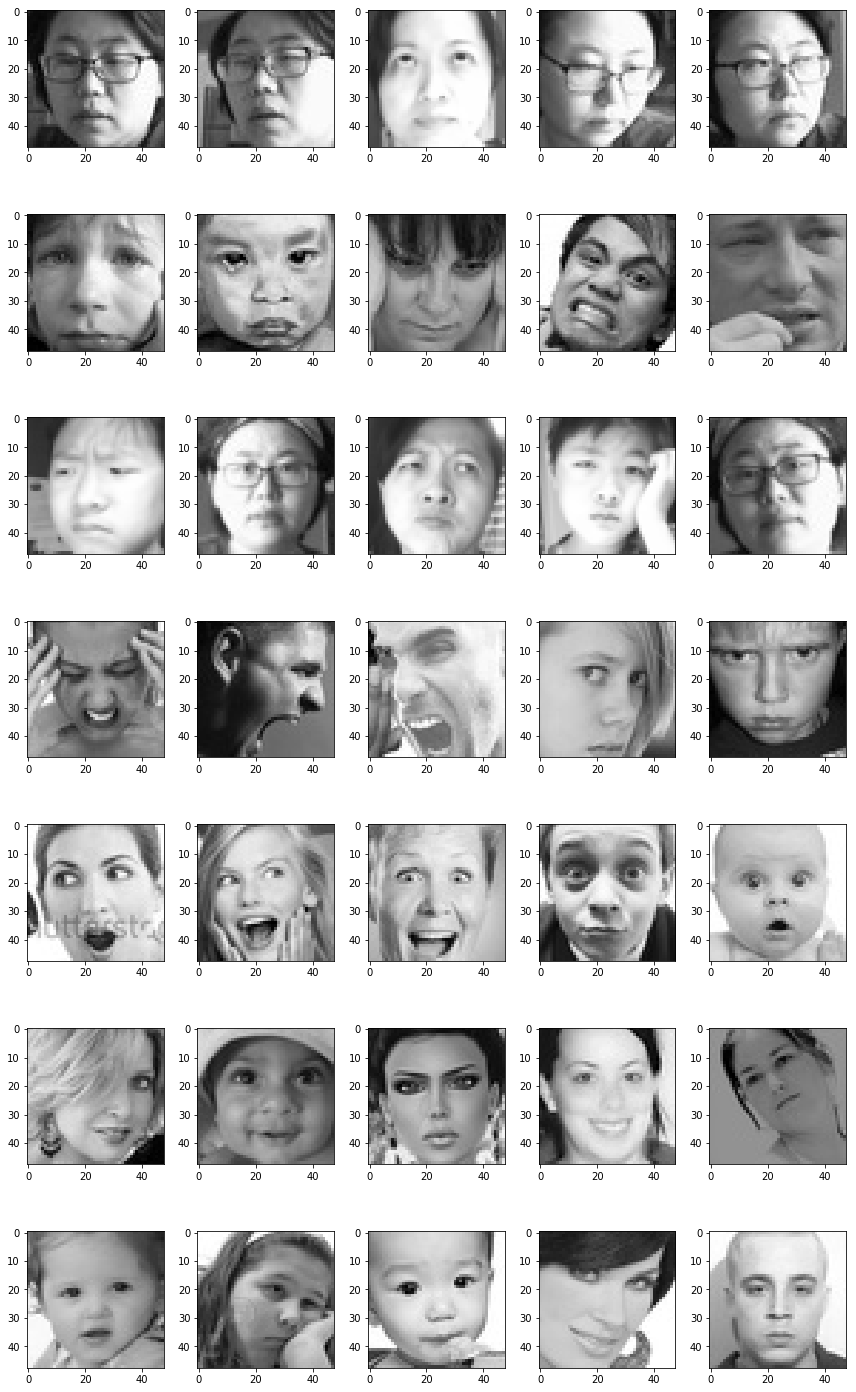

In [11]:
# display some images for every different expression

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os


# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/notebooks/data7cls/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [12]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")


523 distracted images
4938 sad images
649 confused images
3993 angry images
3205 surprise images
7164 happy images
4982 neutral images


In [13]:
# count number of validation images for each expression

for expression in os.listdir(base_path + "validation"):
    print(str(len(os.listdir(base_path + "validation/" + expression))) + " " + expression + " images")

131 distracted images
1139 sad images
163 confused images
960 angry images
797 surprise images
1825 happy images
1216 neutral images


In [14]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 25453 images belonging to 7 classes.
Found 6229 images belonging to 7 classes.


In [15]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
%%time

# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights_7c.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50
198/198 [==============================] - 586s 3s/step - loss: 1.8537 - acc: 0.2800 - val_loss: 1.5180 - val_acc: 0.3645

Epoch 00001: val_acc improved from -inf to 0.36453, saving model to model_weights_7c.h5
Epoch 2/50
198/198 [==============================] - 490s 2s/step - loss: 1.5925 - acc: 0.3635 - val_loss: 1.4176 - val_acc: 0.4271

Epoch 00002: val_acc improved from 0.36453 to 0.42714, saving model to model_weights_7c.h5
Epoch 3/50
198/198 [==============================] - 560s 3s/step - loss: 1.4684 - acc: 0.4154 - val_loss: 1.4820 - val_acc: 0.4211

Epoch 00003: val_acc did not improve from 0.42714
Epoch 4/50
198/198 [==============================] - 808s 4s/step - loss: 1.3826 - acc: 0.4476 - val_loss: 1.4258 - val_acc: 0.4555

Epoch 00004: val_acc improved from 0.42714 to 0.45550, saving model to model_weights_7c.h5
Epoch 5/50
198/198 [==============================] - 810s 4s/step - loss: 1.3151 - acc: 0.4710 - val_loss: 1.1953 - val_acc: 0.5183

Epoch 0000

198/198 [==============================] - 898s 5s/step - loss: 0.5826 - acc: 0.7776 - val_loss: 0.8338 - val_acc: 0.6963

Epoch 00040: val_acc did not improve from 0.71726
Epoch 41/50
198/198 [==============================] - 896s 5s/step - loss: 0.5726 - acc: 0.7810 - val_loss: 0.8172 - val_acc: 0.7046

Epoch 00041: val_acc did not improve from 0.71726
Epoch 42/50
198/198 [==============================] - 894s 5s/step - loss: 0.5516 - acc: 0.7888 - val_loss: 0.8249 - val_acc: 0.7061

Epoch 00042: val_acc did not improve from 0.71726
Epoch 43/50
198/198 [==============================] - 894s 5s/step - loss: 0.5348 - acc: 0.7939 - val_loss: 0.8595 - val_acc: 0.6996

Epoch 00043: val_acc did not improve from 0.71726
Epoch 44/50
198/198 [==============================] - 895s 5s/step - loss: 0.5301 - acc: 0.7968 - val_loss: 0.8020 - val_acc: 0.7097

Epoch 00044: val_acc did not improve from 0.71726
Epoch 45/50
198/198 [==============================] - 899s 5s/step - loss: 0.5181 - ac

In [18]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model_7c.json", "w") as json_file:
    json_file.write(model_json)

## Analyze the result

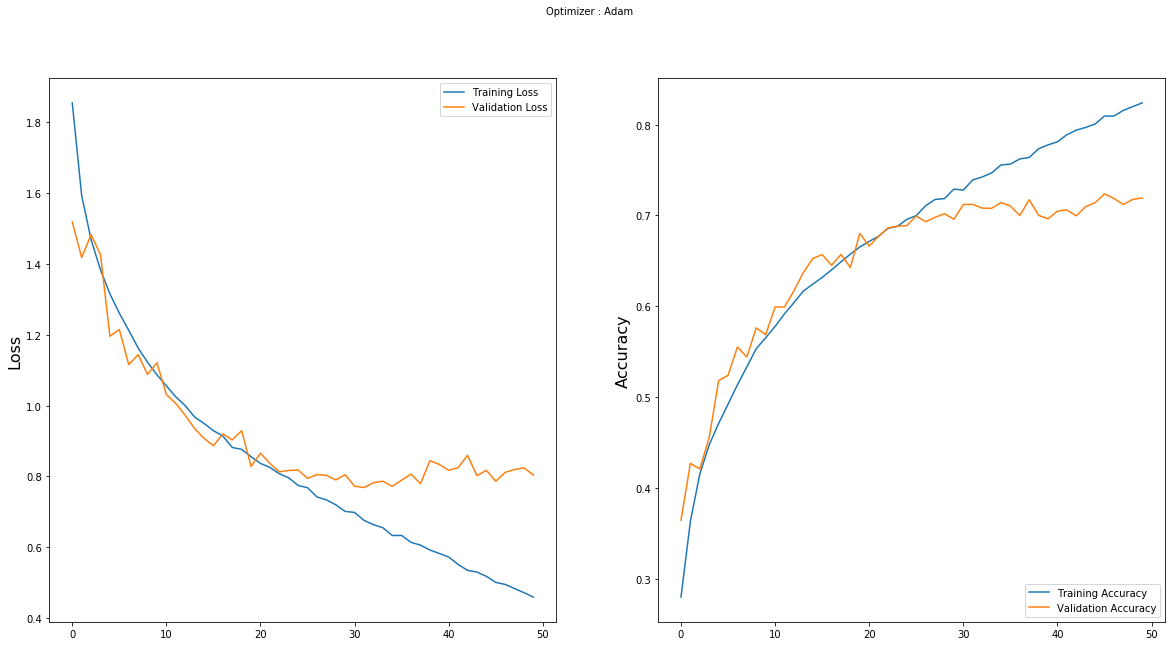

In [19]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


## Confusion Matrix

In [28]:
validation_generator.n

6229

In [29]:
validation_generator.batch_size

128

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

steps = validation_generator.n//validation_generator.batch_size+1
predictions = model.predict_generator(generator=validation_generator, steps=steps)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes

cnf_matrix = confusion_matrix(y_test, y_pred)

cnf_matrix

array([[158,   0,   0,  52,  42,  77, 631],
       [ 92,   0,   0,   9,  17,  37,   7],
       [ 72,   0,   1,  14,  15,  24,   4],
       [283, 164, 131, 945,  83, 172,  47],
       [ 72,   0,   1, 647, 298, 148,  50],
       [ 94,   0,   2, 101, 458, 452,  32],
       [ 80,   1,   1,  49,  93, 489,  84]])

In [26]:
print(validation_generator.class_indices)

{'distracted': 2, 'confused': 1, 'happy': 3, 'sad': 5, 'neutral': 4, 'angry': 0, 'surprise': 6}


In [27]:
print(train_generator.class_indices)

{'distracted': 2, 'confused': 1, 'happy': 3, 'sad': 5, 'neutral': 4, 'angry': 0, 'surprise': 6}


In [31]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       angry       0.19      0.16      0.17       960
    confused       0.00      0.00      0.00       162
  distracted       0.01      0.01      0.01       130
       happy       0.52      0.52      0.52      1825
     neutral       0.30      0.25      0.27      1216
         sad       0.32      0.40      0.36      1139
    surprise       0.10      0.11      0.10       797

    accuracy                           0.31      6229
   macro avg       0.20      0.21      0.20      6229
weighted avg       0.31      0.31      0.31      6229



In [128]:
# show the confusion matrix of our predictions

# compute predictions
# predictions = model.predict_generator(generator=validation_generator, steps=57.484375)
# y_pred = [np.argmax(probas) for probas in predictions]
# y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

ValueError: `steps=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `steps` or use the `keras.utils.Sequence` class.